In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import math
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from IPython.display import Image
from sklearn.linear_model import LinearRegression
import pydotplus
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_original = pd.read_csv('student-por.csv')
df = df_original.copy()

## Hipoteza nr 1 
#Czy wyniki w szkole, wiek i spożycie alkoholu w weekendy wpływa na status związku.
**Zmienna zależne**: romantic\
**Zmienne objaśniające**: age, G3, Walc

**G3** - ocena końcowa (wynik od 0 do 20) \
**age** - wiek ucznia (od 15 do 22) \
**Walc** - weekendowe spożycie alkoholu (1-bardzo mało 5-bardzo dużo) \
**romantic** - czy jest w związku (tak lub nie)

W zależności od dalszych potrzeb, zapisaliśmy zmienne w różnych kombinacjach, w których będziemy mogli ich potrzebować (zmienne ilościowe, jakościowe, zależne, niezależne).

In [4]:
# All vars in hypothesis
var = ['age', 'Walc', 'G3', 'romantic']

# Division into quantitative and qualitative variables
varQuant = ['age', 'G3']
varQualit = ['Walc', 'romantic']

indepVarQuant = ['age', 'G3']
indepVarQualit = ['Walc']

# Division into dependent and explanatory variables
indepVar =  ['age', 'G3', 'Walc']
depVar = ['romantic']

df_all = df[var]
df_indep = df[indepVar]

# 1. Czyszczenie i analiza danych

In [5]:
nan_counts = df[var].isnull().sum()
print(nan_counts)

age         0
Walc        0
G3          0
romantic    0
dtype: int64


Nasz zbiór danych zawiera 649 wierszy. Na początku analizy sprawdziliśmy ile z naszych zmiennych zawiera puste pola. Jak widać powyżej, nie ma takich przypadków.

# Statystyki Opisowe i liczbowe

In [6]:
stats_df = df[varQuant].describe().transpose()
stats_df['median'] = df[varQuant].median()
stats_df['mode'] = df[varQuant].mode().iloc[0]
stats_df['variance'] = df[varQuant].var()
stats_df['std'] = df[varQuant].std()
stats_df = stats_df[['count', 'mean', 'median', 'mode', 'min', 'max', 'std', 'variance']]
stats_df

,count,mean,median,mode,min,max,std,variance
age,649.0,16.744222,17.0,17,15.0,22.0,1.218138,1.483859
G3,649.0,11.906009,12.0,11,0.0,19.0,3.230656,10.437140


In [7]:
for col in df[varQualit]:
    print(df[col].value_counts())

1    247
2    150
3    120
4     87
5     45
Name: Walc, dtype: int64
no     410
yes    239
Name: romantic, dtype: int64


Po zrobieniu ogólnych statystyk opisowych i liczbowych, możemy zauważyć, że większa częśc uczniów nie jest w związku oraz to, że większość rzadko spożywa alkohol w weekendy.

# Tabela wielodzielcza i histogram skategoryzowany

In [8]:
countTab = pd.crosstab(index=df['Walc'], columns=[df['romantic']])
countTab

romantic,no,yes
Walc,,
1,153,94
2,95,55
3,75,45
4,60,27
5,27,18


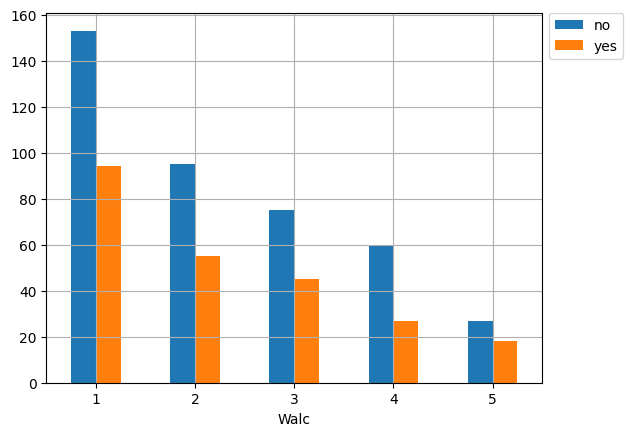

In [9]:
a = countTab.plot(kind='bar', rot=0)
a.legend(bbox_to_anchor=(1, 1.02),
         loc='upper left')
a.grid(True)

Widzimy, że w niezależnie od ilości spożywanego alkoholu w weekend, zawsze dominuje grupa osób nie będących w związku. Przeważnie jest to różnica około dwukrotna. Dla osób dużo imprezujących w weekend te proporcje są nieco mniejsze, jednak mamy tam doczynienia z najmniejszą ilością prób co też może wpływać na wynik.

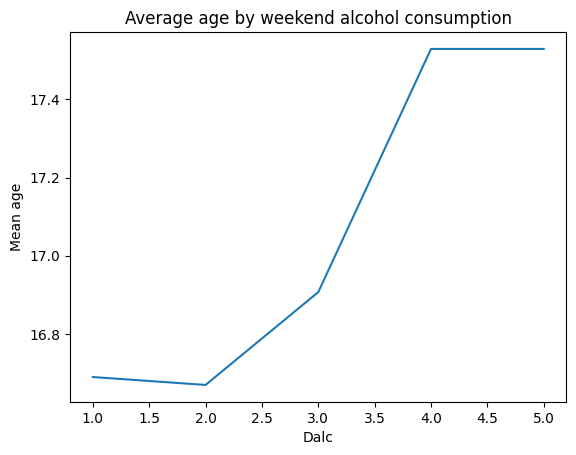

In [14]:
grouped = df.groupby('Dalc')['age'].mean()
grouped.plot(xlabel='Dalc', ylabel='Mean age', title='Average age by weekend alcohol consumption')
plt.show()

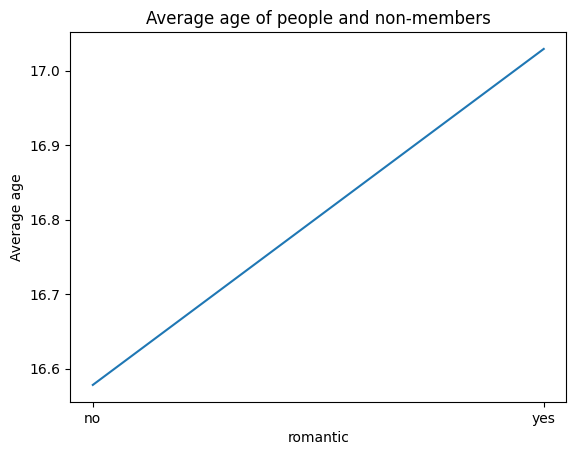

In [18]:
grouped = df.groupby('romantic')['age'].mean()
grouped.plot(xlabel='romantic', ylabel='Average age', title='Average age of people and non-members')
plt.xticks(range(len(grouped)), grouped.index)
plt.show()

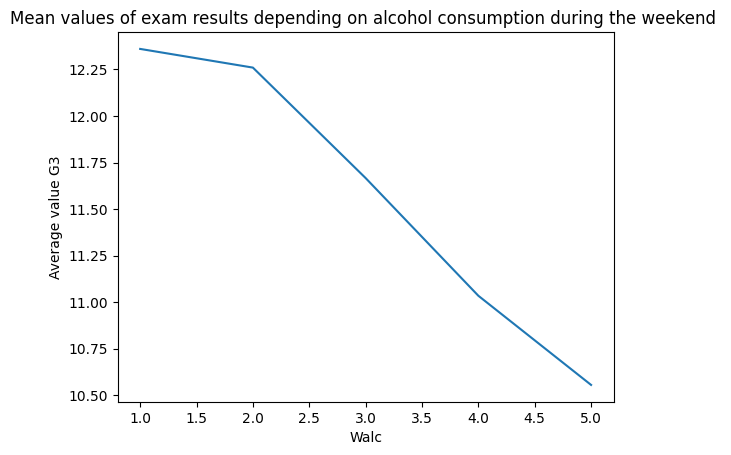

In [16]:
grouped = df.groupby('Walc')['G3'].mean()
grouped.plot(xlabel='Walc', ylabel='Average value G3', title='Mean values ​​of exam results depending on alcohol consumption during the weekend ')
plt.show()

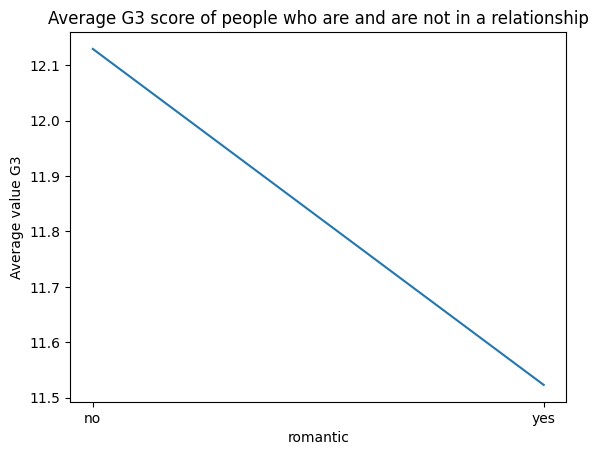

In [17]:
grouped = df.groupby('romantic')['G3'].mean()
grouped.plot(xlabel='romantic', ylabel='Average value G3', title='Average G3 score of people who are and are not in a relationship')
plt.xticks(range(len(grouped)), grouped.index)
plt.show()

Na wykresach średnich można zobaczyć, że studenci mające gorsze wyniki są w związku, a także są starsi. W przypadku spożywania alkoholu w weekendy im starsi studenci tym więcej spożywają, a także im gorsze wyniki z testu tym więcej spożywają

# Histogramy i tetsy normalne

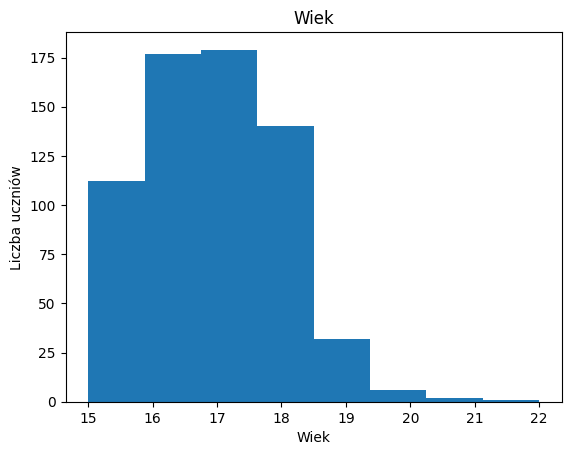

In [ ]:
plt.hist(df['age'], bins=8)
plt.title('Wiek')
plt.xlabel('Wiek')
plt.ylabel('Liczba uczniów')
plt.show()

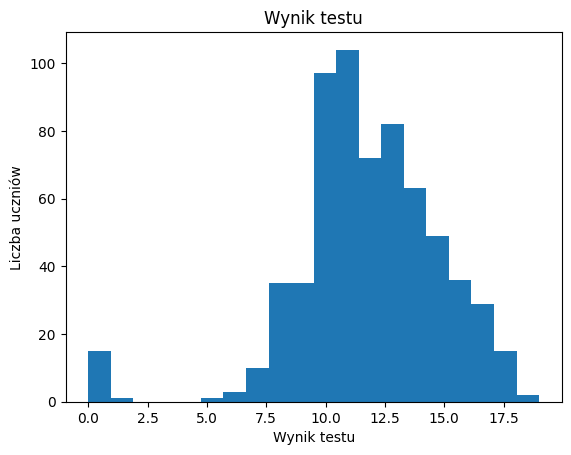

In [ ]:
plt.hist(df['G3'], bins=20)
plt.title('Wynik testu')
plt.xlabel('Wynik testu')
plt.ylabel('Liczba uczniów')
plt.show()

In [19]:
from scipy.stats import shapiro

stat, p = shapiro(df['age'])
alpha = 0.05 
print(p)
if p > alpha:
    print("Variable G3 is normally distributed")
else:
    print("Variable G3 is not normally distributed")

stat, p = shapiro(df['G3'])
alpha = 0.05
print(p)
if p > alpha:
    print("Variable G3 is normally distributed")
else:
    print(" Variable G3 is not normally distributed")

1.5189133983302176e-18
Variable G3 is not normally distributed
2.4177243570922494e-17
 Variable G3 is not normally distributed


# Wykres rozrzutu i macierz korelacji dla zmiennych ilościowych

In [ ]:
df[['age', 'G3', 'Walc']].corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(4)

<ipython-input-13-e89809d41c97>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df[['age', 'G3', 'Walc']].corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(4)


,age,G3,Walc
age,1.0000,-0.1065,0.0864
G3,-0.1065,1.0000,-0.1766
Walc,0.0864,-0.1766,1.0000


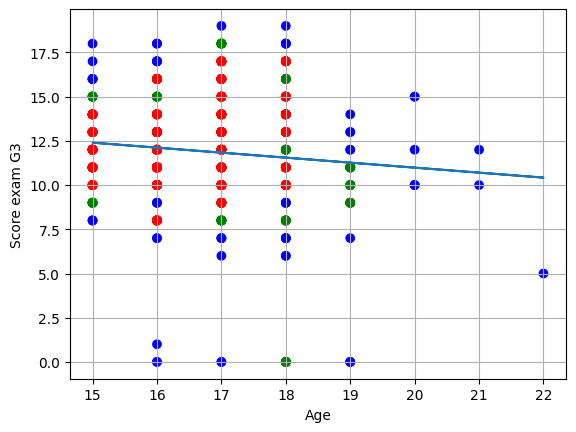

Regression equation:
y = -0.28 * x + 16.64


In [24]:
colors_dict = {comb: 'red' if count > 10 else 'green' if count > 5 else 'blue' for comb, count
               in df.groupby(['age', 'G3']).size().to_dict().items()}

colors = [colors_dict[(abs, age)] for abs, age in zip(df['age'], df['G3'])]

plt.scatter(df['age'], df['G3'], c=colors)

plt.xlabel('Age')
plt.ylabel('Score exam G3')
plt.grid(True)

model = LinearRegression()
model.fit(df[['age']], df['G3'])
y_pred = model.predict(df[['age']])

plt.plot(df['age'], y_pred,  '-', label='Linear Regression')

plt.show()

print("Regression equation:")
print("y =", round(model.coef_[0],2), "* x +", round(model.intercept_,2))

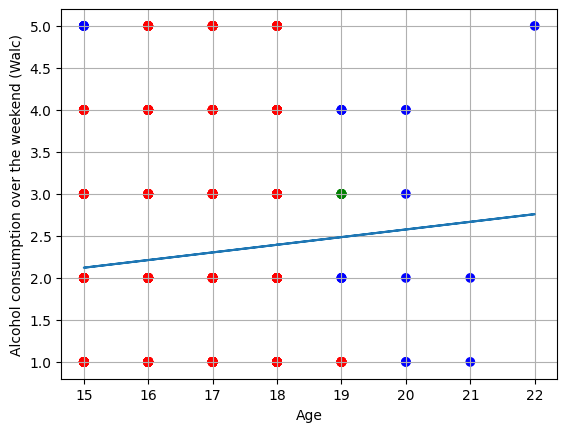

Regression equation:
y = 0.09 * x + 0.76


In [23]:
colors_dict = {comb: 'red' if count > 10 else 'green' if count > 5 else 'blue' for comb, count
               in df.groupby(['age', 'Walc']).size().to_dict().items()}

colors = [colors_dict[(abs, age)] for abs, age in zip(df['age'], df['Walc'])]

plt.scatter(df['age'], df['Walc'], c=colors)

plt.xlabel('Age')
plt.ylabel('Alcohol consumption over the weekend (Walc)')
plt.grid(True)

model = LinearRegression()
model.fit(df[['age']], df['Walc'])
y_pred = model.predict(df[['age']])

plt.plot(df['age'], y_pred,  '-', label='Linear Regression')

plt.show()

print("Regression equation:")
print("y =", round(model.coef_[0],2), "* x +", round(model.intercept_,2))

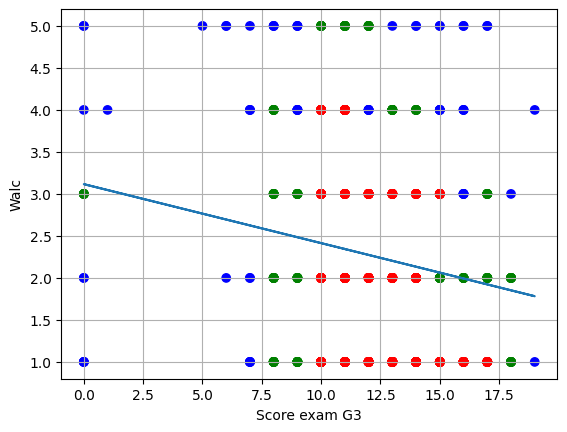

Regression equation:
y = -0.07 * x + 3.12


In [25]:
colors_dict = {comb: 'red' if count > 10 else 'green' if count > 5 else 'blue' for comb, count
               in df.groupby(['G3', 'Walc']).size().to_dict().items()}

colors = [colors_dict[(abs, age)] for abs, age in zip(df['G3'], df['Walc'])]

plt.scatter(df['G3'], df['Walc'], c=colors)

plt.xlabel('Score exam G3')
plt.ylabel('Walc')
plt.grid(True)

model = LinearRegression()
model.fit(df[['G3']], df['Walc'])
y_pred = model.predict(df[['G3']])

plt.plot(df['G3'], y_pred,  '-', label='Linear Regression')

plt.show()

print("Regression equation:")
print("y =", round(model.coef_[0],2), "* x +", round(model.intercept_,2))

Korelacja między zmiennymi ilościowymi (age i G3) wynosi -0.1. Jest to korelacja bardzo słaba, co potwierdza wykres rozrzutu. \
 Dodaliśmy dopasowanie funkcji liniowej. Do obliczania korelacji wykorzystaliśmy także zmienną jakościową Dalc. Zdecydowaliśmy się na to, ponieważ mimo, że jest to zmienna jakościowa to wzrost jej wartości odpowiada wzrostowi spożywania alkoholu, co w pewnym stopniu przypomina zmienną ilościowa i daje poglądodową sytuację w wykresach rozrzutu. Nie odnotowano znacznych korelacji, jednak można zauważyć, że im mniej alkoholu spozywają studenci w weekendy tym więcej takich osób osiąga lepsze wyniki z egzaminu.

# Ramka wąsy

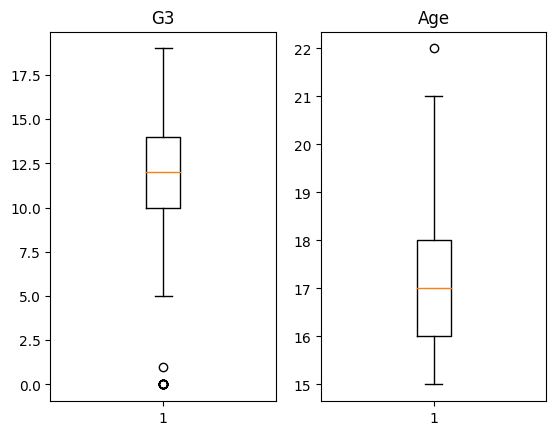

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.boxplot(df['G3'])
ax1.set_title("G3")

ax2.boxplot(df['age'])
ax2.set_title("Age")

plt.show()

# Wykresy ramka wąsy i rozrzutu skategoryzowane względem zmiennej romantic

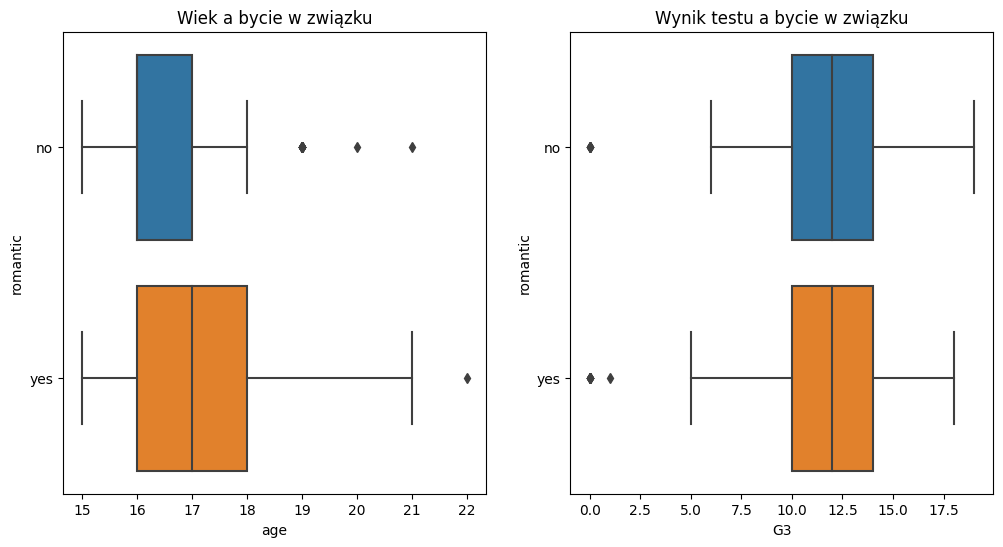

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.boxplot(data=df, x="age", y="romantic", ax=axes[0])
sns.boxplot(data=df, x="G3", y="romantic", ax=axes[1])
axes[0].set_title('Age and being in a relationship')
axes[1].set_title('Exam result and being in a relationship')
plt.show()

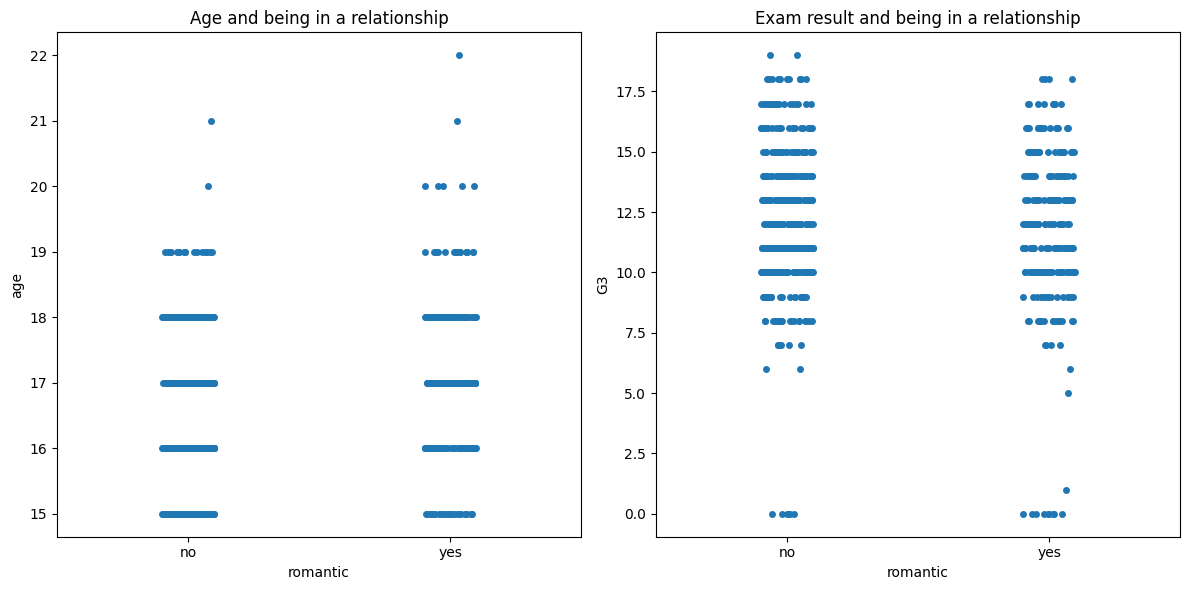

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.stripplot(data=df, x="romantic", y="age", ax=axes[0])
sns.stripplot(data=df, x="romantic", y="G3", ax=axes[1])
axes[0].set_title('Age and being in a relationship')
axes[1].set_title('Exam result and being in a relationship')
plt.tight_layout()
plt.show()

Widzimy wyżej najpierw wykresy ramka wąsy dla zmiennych age i G3 względem zmiennej romantic, a następnie wykresy rozrzutu względem tej zmiennej. W przypadku zmiennej age wykres ramka wąsy pokazuje, że więcej starszych osób jest w związkach. \
W przypadku zmiennej G3 lepszy rezultat widzimy na wykresie rozrzutu, gdzie można zauważyć, że osoby w związku mają te wyniki troche niższe od osób niebędących w związkach.

# Indukcja drzew decyzyjnych
Kolejnym zadaniem było stworzenie drzew decyzyjne. Nasza zmienna zalezna w tej hipotezie jest jakościowa, dlatego skorzystaliśmy z drzewa klasyfikującego. Ustawiliśmy minimalną liczbe przypadków w liściach na 20.

In [ ]:
classifier = DecisionTreeClassifier(min_samples_leaf = 20)
classifier.fit(df[indepVar], df[depVar])

DecisionTreeClassifier(min_samples_leaf=20)

# Ważność predyktorów

age: 0.4108703877259969
G3: 0.47552337642444836
Walc: 0.11360623584955484


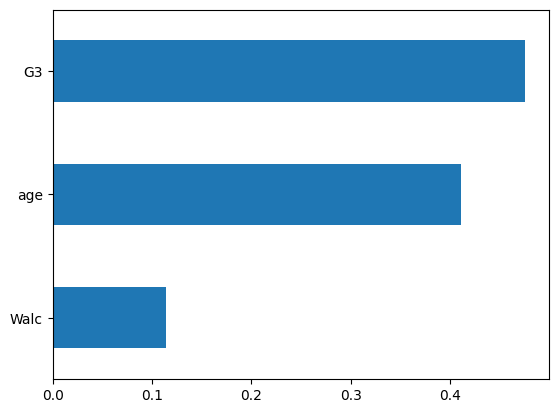

In [ ]:
importances =classifier.feature_importances_
for feature, importance in zip(indepVar, importances):
    print(f'{feature}: {importance}')
importances = pd.Series(classifier.feature_importances_, index=indepVar)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh')
plt.show()

Jak widać największy wpływ na bycie w związku ma wynik testu, podobny wpływ ma wiek. Najmniejsze znaczenie ma zmienna informująca o spozywaniu alkoholu w weekendy.

# Drzewo regresyjne

In [ ]:
classifier.classes_  #label order in tree

array(['no', 'yes'], dtype=object)

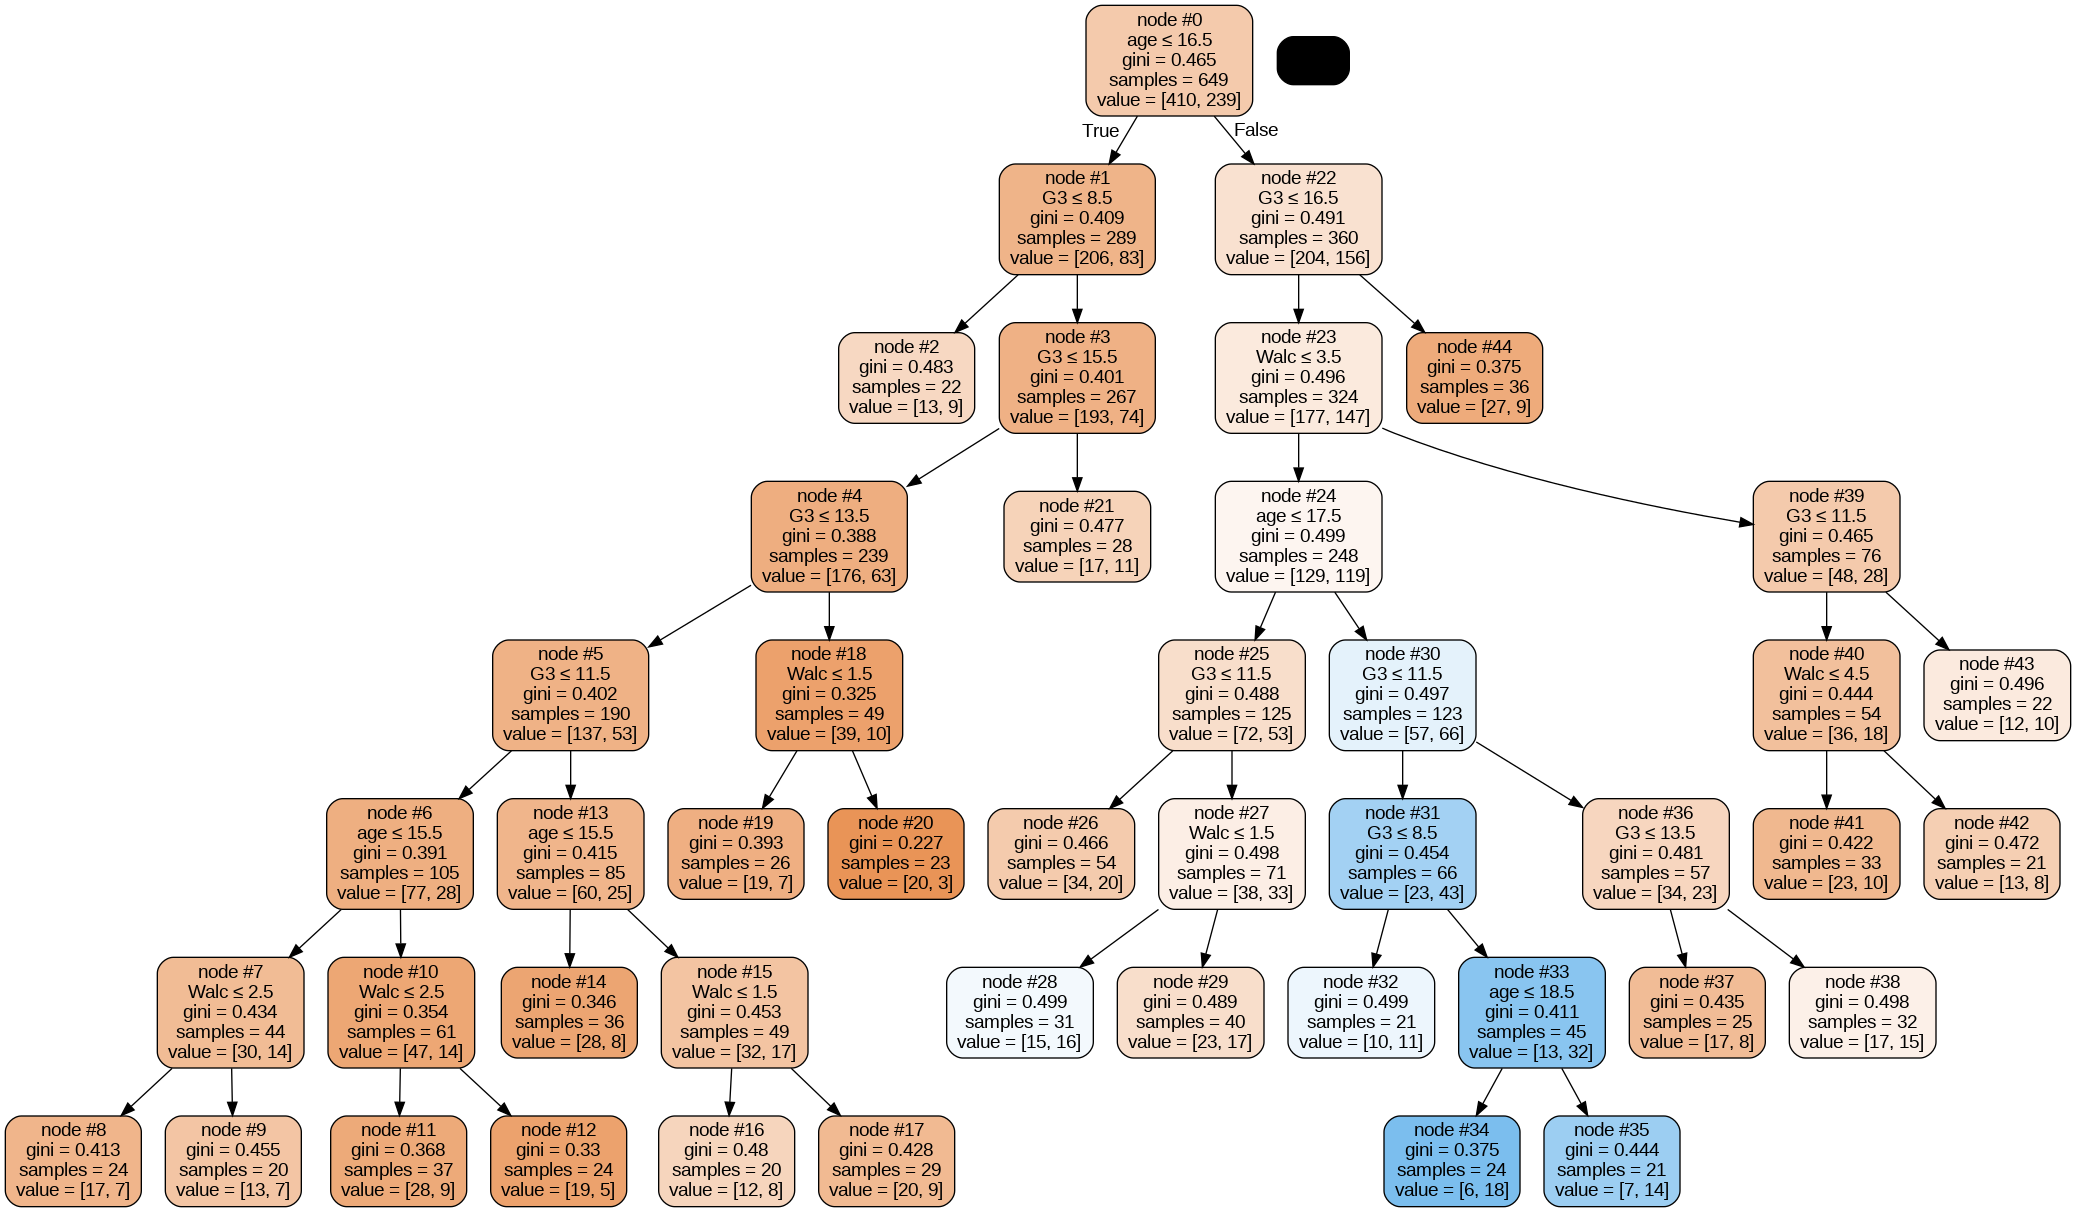

In [ ]:
dot_data = export_graphviz(classifier, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True,
                           feature_names = indepVar,
                           node_ids=True,
                           label='all', 
                           leaves_parallel=False)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Wyznaczyliśmy najpewniejsze reguły, czyli takie które mają najmniejszy wskaźnik Giniego.
1. Węzeł #20. Studenci, którzy z testu otrzymali wynik 14 lub 15 pkt, mają poniżej 17 lat, a w ich współczynnik spożywania alkoholu w weekend wynosi 2 lub więcej  na 87 % nie są w związku. Wsparcie tej reguły wynosi 3%.
2. Węzeł #10 (Niewielka zmiana przy jego rozgałęzieniu na liście #11 i #12, dlatego zdecyowaliśmy wziąć cały węzeł) - Studenci w wieku 16 lat z wynikiem testu poniżej 12 pkt na 77% nie są w związku. Wspracie tej reguły wynosi 9%
3. Węzeł #34. Studenci w wieku 18 lat z wynikiem testu poniżej 12pkt, ale wyższym niż 8 pkt, którzy mają wskaźnik spożywania alkhoolu w weekend 1,2 lub 3 na 75% będą w związku. Wsparcie tej reguły wynosi 4%.

In [28]:
indepVar =  ['age', 'G3', 'Walc']
depVar = ['romantic']

classifier = DecisionTreeClassifier(min_samples_leaf = 20)
classifier.fit(df[indepVar], df[depVar])
y_pred = classifier.predict(df[indepVar])

cm = confusion_matrix(df[depVar], y_pred)
true_positive = cm[1, 1]
false_positive = cm[0, 1]
true_negative = cm[0, 0]
false_negative = cm[1, 0]
cm_df = pd.DataFrame(
    np.array([[true_positive, false_positive], [false_negative, true_negative]]),
    index=['Positive', 'Negative'],
    columns=['Positive', 'Negative']
)
print("Classification matrix:")
print(cm_df)
total_error = (false_positive + false_negative) / cm.sum()

print("Total classification tree error:", round(total_error,2))

Classification matrix:
          Positive  Negative
Positive        59        38
Negative       180       372
Total classification tree error: 0.34


Powyżej widzimy macierz klasyfikacji i całkowitu bład drzewa klasyfikacyjnego. W pierwszym wierszu możemy zobaczyć przypadku poprawnie sklasyfikowane, że student nie jest w związku i jest ich 372, a niepoprawnych 38. Jest to dobry wynik dający skuteczność ponad 90%. Niestety gorzej prezentuje się przeiwdywanie czy osoba jest w związku. Ponieważ tutaj klasyfikor częściej się myli i to aż 3 krotnie. Całkowity błąd drzewa otrzymaliśmy 34%. 

# Analiza Skupień

In [29]:
df['romantic_bin'] = df['romantic'].copy()
romanticKey = {'yes': 1, 'no': 0 } 
for key, value in romanticKey.items():
  df['romantic_bin'] = df['romantic_bin'].replace(key, value)

Zaczęliśmy od zbinaryzowania zmiennej romantic ( 1 oznacza bycie w związku, 0 brak związku) dodalismy zmienną 'romantic_bin. 

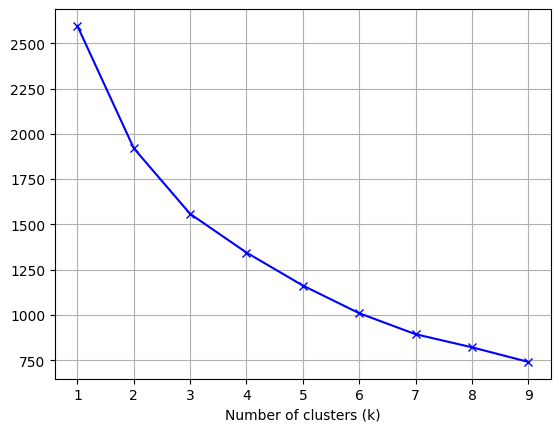

In [31]:
scaler = StandardScaler(with_mean=False)
scaled_data = scaler.fit_transform(df[['age','romantic_bin', 'G3', 'Walc']])

sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(scaled_data)
    sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(scaled_data)
labels = kmeans.predict(scaled_data)
centers = kmeans.cluster_centers_
df_cluster =pd.DataFrame(data=df, columns=['age', 'G3', 'Walc', 'romantic_bin'])
df_cluster['kmean_3'] = kmeans.labels_
cluster_means = df_cluster.groupby('kmean_3').mean()
cluster_counts = df_cluster['kmean_3'].value_counts()
cluster_means['count'] = [cluster_counts[i] for i in cluster_means.index]
cluster_means

,age,G3,Walc,romantic_bin,count
kmean_3,,,,,
0,16.410959,12.770548,1.633562,0.000000,292
1,16.968553,10.100629,4.062893,0.257862,159
2,17.055556,12.080808,1.803030,1.000000,198


Na początku sprawdizlismy metodą łokcia ile powinniśmy mieć klastrów. Zdecydowaliśmy się na 3. Następnie po podziale na klastry sprawdziliśmy rozkład średnich w danych grupach. Zmienną romantic_bi możemy interpretowac w ten sposób, że ułamek, kóry widzimy to procent osób będących w związku w danym klastrze. Widzimy zatem , że klaster 0 i 2 są całkowicie rodzdzielone na wobec tych zmiennych. Osoby nie będące w związku mają wspołczynnik G3 wyższy o 0.7 pkt, troche mniej spożywają alkoholu w weekend, a także srednia wieku jest niższa. Ciekawa sytuacja jest w klastrze nr 1, gdzie średnia zmiennej Walc jest zdecyowowanie wyższa niż w pozostałych klastrów, a G3 niższa od pozostałych. Można na tej podtsaiwe stwierdzić ze duże spożywanie alkoholu w weekend wpływa na gorsze wyniki testu. 

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=5)
gmm.fit(scaled_data)
labels = gmm.predict(scaled_data)
centers = gmm.means_
df_cluster = pd.DataFrame(data=df, columns=['age', 'G3', 'Walc', 'romantic_bin'])
df_cluster['gmm_3'] = labels
cluster_means = df_cluster.groupby('gmm_3').mean()
cluster_counts = df_cluster['gmm_3'].value_counts()
cluster_means['count'] = [cluster_counts[i] for i in cluster_means.index]
cluster_means

,age,G3,Walc,romantic_bin,count
gmm_3,,,,,
0,18.250000,0.000000,3.000000,0.0,4
1,16.561576,12.248768,2.293103,0.0,406
2,17.029289,11.523013,2.246862,1.0,239


W naszym przypadku algorytm EM nie sprawdził się najlepiej, widzimy jeden klaster z czterema przypadkami, który zebrał grupe ludzi z wynikiem 0 z egzaminu. Pozostałe dwa klastry to po prostu rozdzielenie na ludzi będących w związku i niebędacych. Algorytm k-średnich pozwolił nam wyciagnąć ciekawsze wnioski w tej hipotezie

# Naiwny Bayes

Jako trzeci klasyfikator zdecydowaliśmy sie na Naiwnego Bayesa. Jako, że nasze zmienne ilościowe mają określoną liczbe i nie jest ona bardzo duża zdecyowaliśmy się na użycie funkcji get_dumies, która wszytkie zmienne jakościowe zamienia na nowe binarne kolumny, która mowi czy dana kategoria występuje czy nie, zrobiliśmy to dla wieku, wyniku testu i spożywania alkoholu w weekend. 

In [32]:
pd.options.display.max_columns = None
X = pd.get_dummies(df[indepVar], columns=indepVar)
y = df['romantic']
clf = GaussianNB()
clf.fit(X, y)
prob_values = pd.DataFrame(clf.theta_, columns=X.columns)
prob_values = prob_values.set_index(clf.classes_)
print('The probability of each trait in the class')
print(prob_values.round(3))

The probability of each trait in the class
     age_15  age_16  age_17  age_18  age_19  age_20  age_21  age_22   G3_0  \
no    0.205   0.298   0.266   0.185   0.041   0.002   0.002   0.000  0.015   
yes   0.117   0.230   0.293   0.268   0.063   0.021   0.004   0.004  0.038   

      G3_1   G3_5   G3_6   G3_7   G3_8   G3_9  G3_10  G3_11  G3_12  G3_13  \
no   0.000  0.000  0.005  0.015  0.049  0.049  0.137  0.178  0.110  0.137   
yes  0.004  0.004  0.004  0.017  0.063  0.063  0.172  0.130  0.113  0.109   

     G3_14  G3_15  G3_16  G3_17  G3_18  G3_19  Walc_1  Walc_2  Walc_3  Walc_4  \
no   0.107  0.068  0.051  0.049  0.027  0.005   0.373   0.232   0.183   0.146   
yes  0.079  0.088  0.063  0.038  0.017  0.000   0.393   0.230   0.188   0.113   

     Walc_5  
no    0.066  
yes   0.075  


I tak o to widzimy prawdopodobieństwa wystąpienia każdego przypadku dla danej klasy. W przypadku wieku widzimy,że od 18 roku życia jest większa sznasa na bycie w związku. W przypadku wyniku testu G3 nie widać aż tak dużych różnic, ale można zauważyć ze wynik poniżej 10 pkt, czyli oblanie testu częściej się przytrafia w grupie ludzi będących w związku. Co do zmiennej Walc raczej różnice nie są aż tak duże.

## WNIOSKI 

Naszym zadaniem było sprawdzić hipotezę czy wiek, wynik testu i ilość spożywanego alkoholu w weekendy wpływa na to, czy studenci są w związkach. Większość analiz potwierdziła, że wiek wpływa na bycie w związku. Mianowicie starsi studenci zdecydowanie częściej są w związkach niż młodsi. \
Co do wyniku testu, można zauważyć, że osoby będące w związku częściej osiągały gorsze wyniki, jednak ta różnica jest na tyle mała, że cięzko nam się całkowicie zgodzić z ta hipotezą.  \
Zmienna Walc, czyli ilość spożywanego alkoholu nie wpływa na bycie w związku. Praktycznie w żadnym klasyfikatorze nie bylismy w stanie potwierdzić, żeby miała ona większy wpływ na bycie w związku. \
